In [1]:
%config InlineBackend.rc = {"figure.dpi": 72, "figure.figsize": (6.0, 4.0)}
%matplotlib inline

import ase
import matplotlib.pyplot as plt
import numpy as np
from ase.build import bulk

import abtem
from ase.io import read

C:\Users\Joshu\anaconda3\envs\myenv\lib\site-packages\cupy\_environment.py:214: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(


In [2]:
atoms=read(r"C:\Users\Joshu\Desktop\For python\Simulated_Moleculare_Models\Pd_1000_NP.cfg")

In [3]:
from ase.io import visualise
view(atoms)

ImportError: cannot import name 'visualise' from 'ase.io' (C:\Users\Joshu\anaconda3\envs\myenv\lib\site-packages\ase\io\__init__.py)

In [ ]:
silicon = bulk("Si", crystalstructure="diamond")

abtem.show_atoms(atoms, plane="xy");

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
abtem.show_atoms(atoms, ax=ax1, title="Beam view")
abtem.show_atoms(atoms, ax=ax2, plane="xz", title="Side view", linewidth=0.0);

In [4]:
frozen_phonons = abtem.FrozenPhonons(atoms, 8, {"Pd": 0.078})

In [5]:
potential = abtem.Potential(
    frozen_phonons,
    sampling=0.2,
    projection="infinite",
    slice_thickness=2,
    exit_planes=80,
)

In [6]:
wave = abtem.Probe(energy=200e3, semiangle_cutoff=9.4)
wave.grid.match(potential)

[########################################] | 100% Completed | 106.92 ms


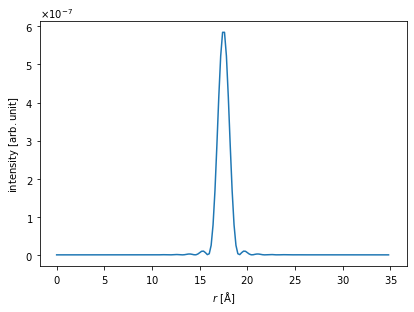

In [7]:
wave.profiles().show();

In [8]:
measurement = wave.multislice(potential).diffraction_patterns(max_angle=30)

In [9]:
measurement = measurement.mean(0)

measurement.compute()

[########################################] | 100% Completed | 1.69 sms


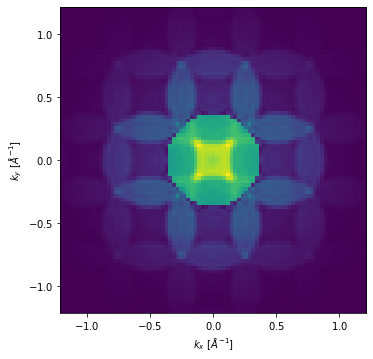

In [10]:
visualization = measurement.show(
    explode=True,
    figsize=(16, 5),
)